In [87]:
import pandas as pd 

commits_df = pd.read_csv('commits.csv')
issues_df = pd.read_csv('issues.csv')
pr_df = pd.read_csv('pull_requests.csv')


commits_df = commits_df.sort_values(by=['repo_name', 'event_datetime'], ascending=[True, True])
pr_df = pr_df.sort_values(by=['repo_name', 'event_datetime'], ascending=[True, True])
issues_df = issues_df.sort_values(by=['repo_name', 'event_datetime'], ascending=[True, True])

In [88]:
commits_df.head()

,Unnamed: 0,repo_id,repo_name,data_collection_date,event_type,event_datetime,contributor_name
314534,314534,26083,3rd-Party-Libs,2023-02-28 16:46:00,commit,2017-11-14 19:06:42-06:00,Vahid Daneshmand
314550,314550,26083,3rd-Party-Libs,2023-02-28 16:46:00,commit,2017-11-14 20:00:46-06:00,Vahid Daneshmand
314548,314548,26083,3rd-Party-Libs,2023-02-28 16:46:00,commit,2017-11-14 20:22:26-06:00,Vahid Daneshmand
314549,314549,26083,3rd-Party-Libs,2023-02-28 16:46:00,commit,2020-01-27 07:39:59-06:00,Vahid Daneshmand
1218250,1218250,26061,ADIOS,2023-02-28 16:46:00,commit,2008-06-04 15:40:03-05:00,Fang Zheng


In [89]:
pr_df.head()

,Unnamed: 0,repo_id,repo_name,data_collection_date,event_type,event_datetime,contributor_name,pr_merge_status
807,807,25913,BiG-CZ-Portal,2023-02-28 16:46:00,pull_request_created,2017-06-27 17:52:11,lsetiawan,merged
128,128,25840,Controllers,2023-02-28 16:46:00,pull_request_created,2014-03-04 23:16:14,kyuhojeong,merged
127,127,25840,Controllers,2023-02-28 16:46:00,pull_request_created,2014-03-31 20:35:17,kyuhojeong,merged
126,126,25840,Controllers,2023-02-28 16:46:00,pull_request_created,2014-04-20 23:23:22,kyuhojeong,merged
122,122,25840,Controllers,2023-02-28 16:46:00,pull_request_created,2014-04-29 03:56:20,pstjuste,merged


In [90]:
issues_df.head()

,Unnamed: 0,repo_id,repo_name,data_collection_date,event_type,event_datetime,contributor_name
7410,7410,26061,ADIOS,2023-02-28 16:46:00,issue_created,2013-06-10 15:16:48,isosc
7409,7409,26061,ADIOS,2023-02-28 16:46:00,issue_created,2013-07-16 04:33:28,isosc
7408,7408,26061,ADIOS,2023-02-28 16:46:00,issue_created,2013-09-04 20:08:26,isosc
7407,7407,26061,ADIOS,2023-02-28 16:46:00,issue_created,2013-09-13 18:05:21,bdtaylor
7406,7406,26061,ADIOS,2023-02-28 16:46:00,issue_created,2013-09-13 18:36:58,bdtaylor


I've decided to plot the top 10 amount of people that are sending pull requests and looking at the percentage of their pull requests that were merged in comparison to those that weren't merged. From this, I wanted to dive deeper into some of the specific users themselves to see if there were any underlying patterns for commit counts or why some may have a higher amount of PRs than others or why some may have a higher merge rate. I also wanted to look further into the motivation behind why these people have such a high amount of pull requests that they are opening. As Fogel makes note of in Producing Open Source Software, contributors may make these contributions because it’s their job but a lot of times there’s more than just money being the motivation for why one would contribute. They often times have some other underlying motivation that “goes beyond making a mere management request.” (Fogel, 2005, p. 136)

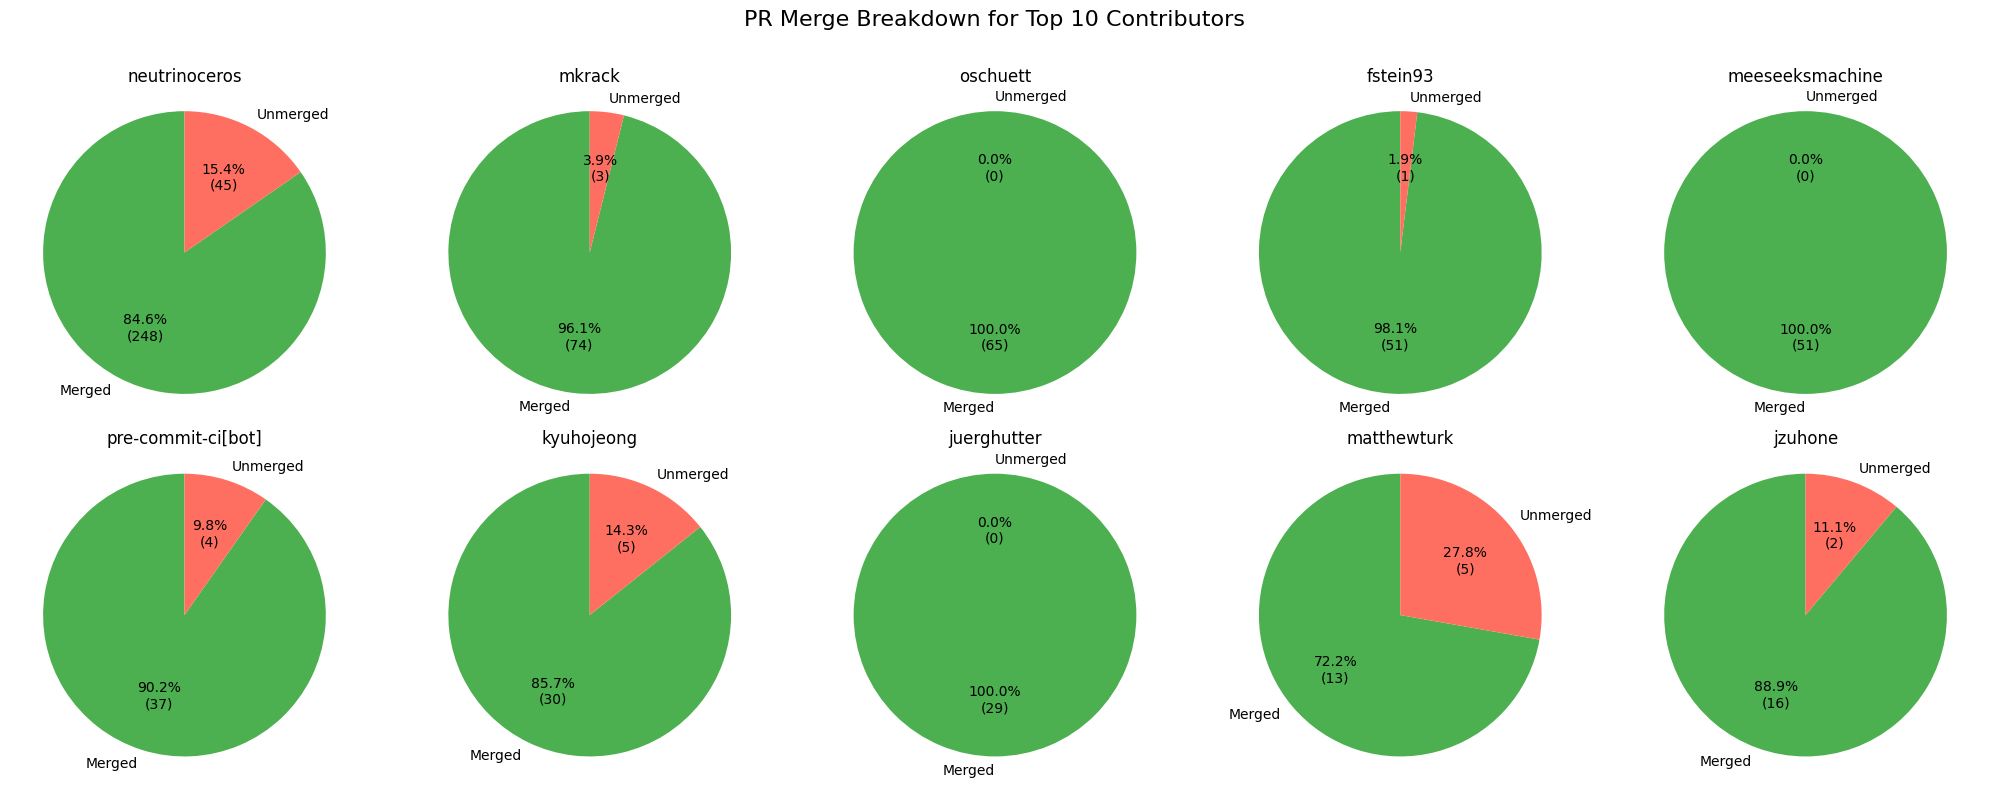

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume pr_df is your DataFrame and it has the following columns:
# - contributor_name
# - pr_merge_status (values like "merged", "unmerged", etc.)

# Get top 10 contributors by number of PRs
top_contributors = (
    pr_df["contributor_name"]
    .value_counts()
    .head(10)
    .index.tolist()
)

# Set up the figure for 10 subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
axes = axes.flatten()

# Function to format labels with percentage and raw count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return my_autopct

# Loop through each contributor and create a pie chart
for i, contributor in enumerate(top_contributors):
    # Total and merged counts
    total = pr_df[pr_df["contributor_name"] == contributor].shape[0]
    merged = pr_df[
        (pr_df["contributor_name"] == contributor) &
        (pr_df["pr_merge_status"] == "merged")
    ].shape[0]
    unmerged = total - merged

    # Pie chart values
    values = [merged, unmerged]
    labels = ["Merged", "Unmerged"]
    colors = ["#4CAF50", "#FF6F61"]

    # Plot
    axes[i].pie(
        values,
        labels=labels,
        autopct=make_autopct(values),
        colors=colors,
        startangle=90
    )
    axes[i].axis('equal')  # Equal aspect ratio ensures pie is a circle.
    axes[i].set_title(contributor)

# Plot formatting
plt.suptitle("PR Merge Breakdown for Top 10 Contributors", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust space for suptitle
plt.show()


In [98]:
# Convert to datetime and then into period
pr_df['event_datetime'] = pd.to_datetime(pr_df['event_datetime'], errors='coerce')

pr_df['period'] = pr_df['event_datetime'].dt.to_period('M')


The first user I looked at is neutrinoceros since they have the highest amount of PRs by a lot. Upon looking at their profile I see that is trained as a computational astrophysicist and is a maintainer of several scientific python packages. This background and expertise makes a lot of sense and can somewhat explain the motivation behind being active in the software community sending pull requests. He also has a handful of unmerged pull requests but that's hard to say if this is due to them being not reviewed yet and therefore they haven't been merged or if the code wasn't sufficient enough and it had to be closed. Looking at his background and serving as a maintainer for a handful of scientific python packages the former is more likely. 

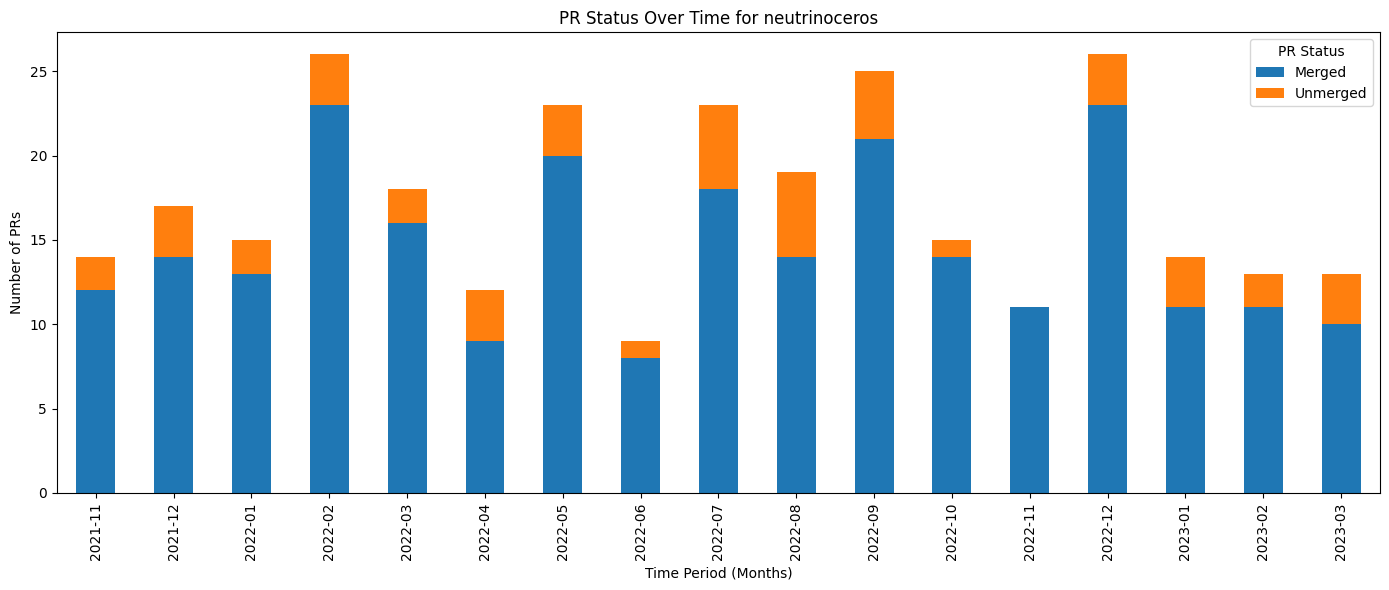

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for a specific contributor
contributor = "neutrinoceros"  # <-- change to the username you want

user_prs = pr_df[pr_df["contributor_name"] == contributor].copy()

# Make sure you have a date column. If not, you'll need to have a 'pr_created_at' or similar.
# Assuming you have 'pr_created_at', and it's datetime. If not, convert:
user_prs['event_datetime'] = pd.to_datetime(user_prs['event_datetime'])

# Count merged and unmerged per month
merged_counts = (
    user_prs[user_prs['pr_merge_status'] == 'merged']
    .groupby('period')
    .size()
)
unmerged_counts = (
    user_prs[user_prs['pr_merge_status'] != 'merged']
    .groupby('period')
    .size()
)

# Combine into a DataFrame for plotting
timeline_df = pd.DataFrame({
    'Merged': merged_counts,
    'Unmerged': unmerged_counts
}).fillna(0)  # fill months with 0 if no activity

# Plotting
timeline_df.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title(f"PR Status Over Time for {contributor}")
plt.xlabel("Time Period (Months)")
plt.ylabel("Number of PRs")
plt.legend(title="PR Status")
plt.tight_layout()
plt.show()


Another one of the users I wanted to look more into is matthewturk since he has the highest percentage of commits that are still left unmerged. By looking at their github, they are a professor in the School of Information Science at University of Illinois whose research focuses on how individuals interact with data and how the data is processed and understood. It's hard to determine the reason for the proportion of pull requests that aren't merged given his expertise but given I had more time I would take a deeper dive into all of the pull requests individually to try to determine if the code has even been reviewed for the pull request to be accepted.


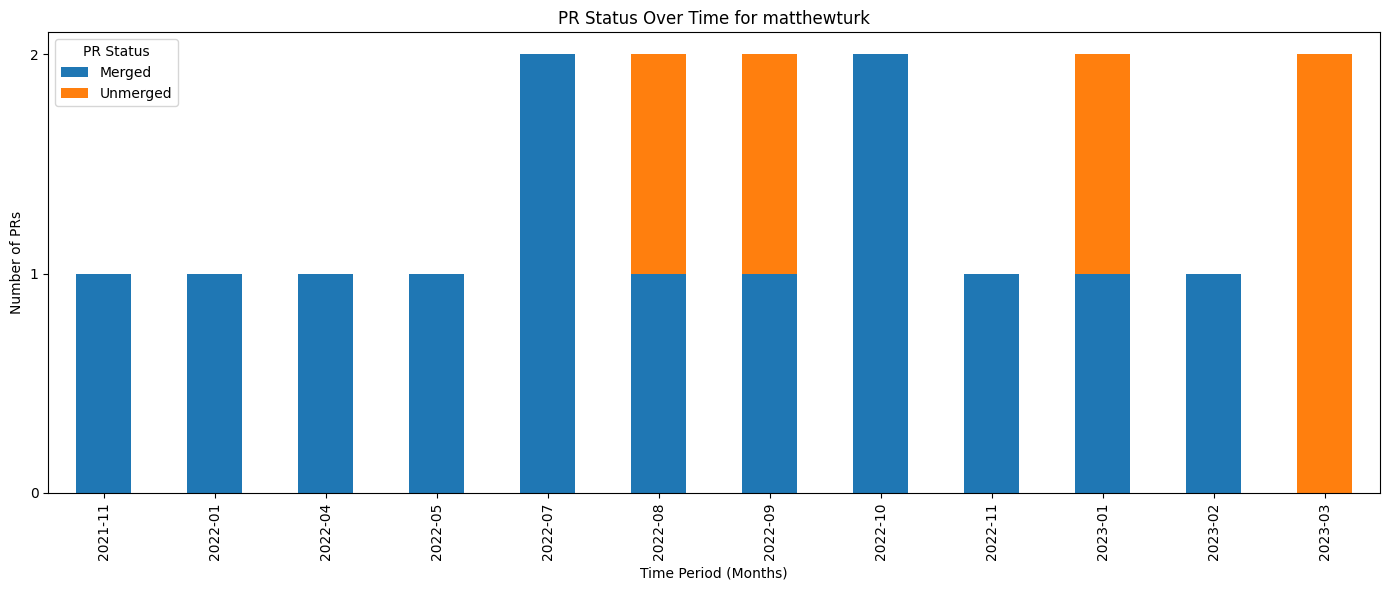

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filter for a specific contributor
contributor = "matthewturk"  # <-- change to the username you want

user_prs = pr_df[pr_df["contributor_name"] == contributor].copy()

# Make sure you have a date column. If not, you'll need to have a 'pr_created_at' or similar.
# Assuming you have 'pr_created_at', and it's datetime. If not, convert:
user_prs['event_datetime'] = pd.to_datetime(user_prs['event_datetime'])

# Count merged and unmerged per month
merged_counts = (
    user_prs[user_prs['pr_merge_status'] == 'merged']
    .groupby('period')
    .size()
)
unmerged_counts = (
    user_prs[user_prs['pr_merge_status'] != 'merged']
    .groupby('period')
    .size()
)

# Combine into a DataFrame for plotting
timeline_df = pd.DataFrame({
    'Merged': merged_counts,
    'Unmerged': unmerged_counts
}).fillna(0)  # fill months with 0 if no activity

# Plotting
ax = timeline_df.plot(kind='bar', stacked=True, figsize=(14, 6))
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title(f"PR Status Over Time for {contributor}")
plt.xlabel("Time Period (Months)")
plt.ylabel("Number of PRs")
plt.legend(title="PR Status")
plt.tight_layout()
plt.show()

I also decided to look at the user oschuett since all of his pull requests have been merged that he has opened. Upon further research it appears he is a software engineer at Google as well as a core developer of CP2K which is an open source quantum chemistry and solid state physics package which can help explain his motivation behind his pull requests. This person is clearly a talented software engineer through his background which can help explain why all of his pull requests have been merged.

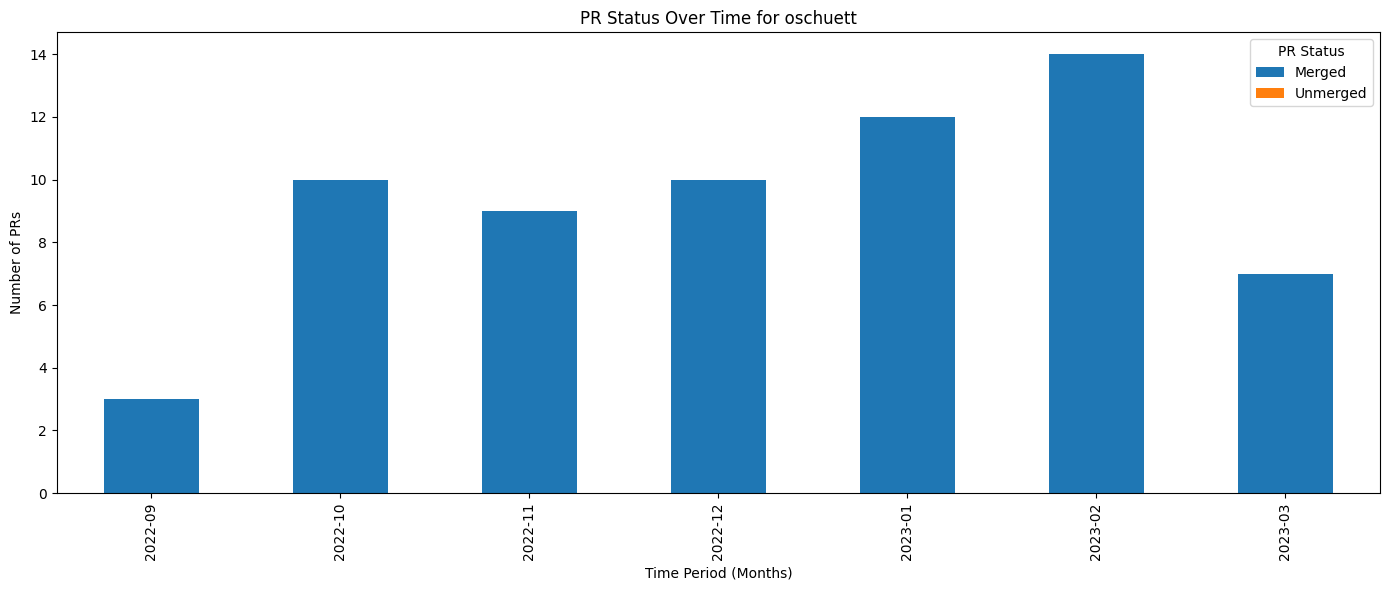

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for a specific contributor
contributor = "oschuett"  # <-- change to the username you want

user_prs = pr_df[pr_df["contributor_name"] == contributor].copy()

# Make sure you have a date column. If not, you'll need to have a 'pr_created_at' or similar.
# Assuming you have 'pr_created_at', and it's datetime. If not, convert:
user_prs['event_datetime'] = pd.to_datetime(user_prs['event_datetime'])

# Count merged and unmerged per month
merged_counts = (
    user_prs[user_prs['pr_merge_status'] == 'merged']
    .groupby('period')
    .size()
)
unmerged_counts = (
    user_prs[user_prs['pr_merge_status'] != 'merged']
    .groupby('period')
    .size()
)

# Combine into a DataFrame for plotting
timeline_df = pd.DataFrame({
    'Merged': merged_counts,
    'Unmerged': unmerged_counts
}).fillna(0)  # fill months with 0 if no activity

# Plotting
timeline_df.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title(f"PR Status Over Time for {contributor}")
plt.xlabel("Time Period (Months)")
plt.ylabel("Number of PRs")
plt.legend(title="PR Status")
plt.tight_layout()
plt.show()

The last user I chose to look at is mkrack since they have the second most pull requests submitted out of the dataset. Looking at their github it appears that they work as a researcher in the Paul Scherrer Institute and are also a core developer of the CP2K software like Ole Schütt better known as oschuett from his github username. This makes sense given the consistent pull requests overtime since being a core developer he’s working on improvements to CP2K, and therefore needs to be opening pull requests for these improvements to go through

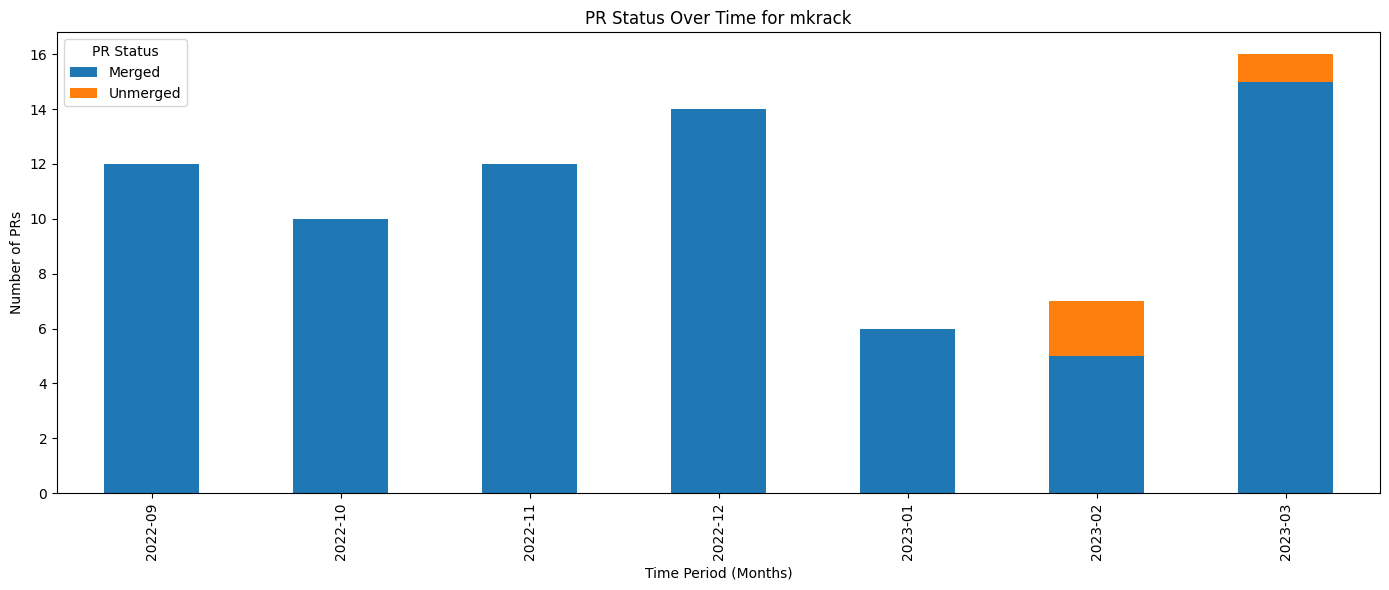

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filter for a specific contributor
contributor = "mkrack"  # <-- change to the username you want

user_prs = pr_df[pr_df["contributor_name"] == contributor].copy()

# Make sure you have a date column. If not, you'll need to have a 'pr_created_at' or similar.
# Assuming you have 'pr_created_at', and it's datetime. If not, convert:
user_prs['event_datetime'] = pd.to_datetime(user_prs['event_datetime'])

# Count merged and unmerged per month
merged_counts = (
    user_prs[user_prs['pr_merge_status'] == 'merged']
    .groupby('period')
    .size()
)
unmerged_counts = (
    user_prs[user_prs['pr_merge_status'] != 'merged']
    .groupby('period')
    .size()
)

# Combine into a DataFrame for plotting
timeline_df = pd.DataFrame({
    'Merged': merged_counts,
    'Unmerged': unmerged_counts
}).fillna(0)  # fill months with 0 if no activity

# Plotting
ax = timeline_df.plot(kind='bar', stacked=True, figsize=(14, 6))
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title(f"PR Status Over Time for {contributor}")
plt.xlabel("Time Period (Months)")
plt.ylabel("Number of PRs")
plt.legend(title="PR Status")
plt.tight_layout()
plt.show()

Interestingly, these four contributors that I examined in depth were all either researchers or academics. These are individuals where scientific collaboration and continual iteration and improvement are core aspects of their profession. While it’s likely that some of their PRs are tied to this profession, their continuous commits also represent an underlying intrinsic motivation. The open source model reflects the collaborative and iterative nature of academic research. As scientists by nature, I believe these contributors, alongside it being part of their job, are likely drawn to the open source model because of its similarity to academic research of building on the work of others, contributing improvements and the goal of shared progress, an essential aspect in science. (Fogel, 2005)


*** References ***

Fogel, K. (2005). Producing open source software: How to run a successful free software project. “O’Reilly Media, Inc.”